# **1. Perkenalan Dataset**


Pada proyek Machine Learning ini, saya menggunakan dataset bernama Bank Transaction Dataset for Fraud Detection.

1. Sumber Dataset
Dataset ini diperoleh dari platform data Kaggle. Sumber dataset dapat dilihat [di sini.](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection)

2. Informasi Mengenai Dataset
Dataset ini berisi data transaksi, atribut transaksi, demografi pengguna, dan pola aktivitas finansial bank yang cocok untuk analisis deteksi penipuan bank dan keamanan finansial. Secara keseluruhan, dataset ini berisi 2512 baris dan 16 fitur.

# **2. Import Library**

In [ ]:
import os
import math
import kagglehub
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# **3. Memuat Dataset**

In [ ]:
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

print("Path to dataset files:", path)

100%|██████████| 102k/102k [00:00<00:00, 26.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4


In [ ]:
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
print("CSV files found:", csv_files)

CSV files found: ['bank_transactions_data_2.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, csv_files[0]))
df.head()

TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-11-04 08:08:08  
1        13758.91     2024-11-04 08:09:35  
2         1122.35     2024-11-04 08:07:04  
3         8569.06     2024-11-04 08:09:06  
4         7429.40     2024-11-04 08:06:39

# **4. Exploratory Data Analysis (EDA)**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Berdasarkan informasi di atas, ada 5 kolom berjenis numerikal yaitu TransactionAmount (Jumlah transaksi) dan AccountBalance (Saldo akun) yang bertipe float, kemudian CustomerAge (Usia), TransactionDuration (Durasi Transaksi), dan LoginAttempts (Percobaan Login) bertipe integer. Sedangkan yang lainnya bertipe kategorikal.

Adapun jumlah baris yaitu 2512 baris, dan jumlah kolom sebanyak 16 kolom. Hal ini menunjukkan bahwa fitur dalam dataset ada 16 fitur.

In [ ]:
print(df.columns)

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')


In [ ]:
df.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000

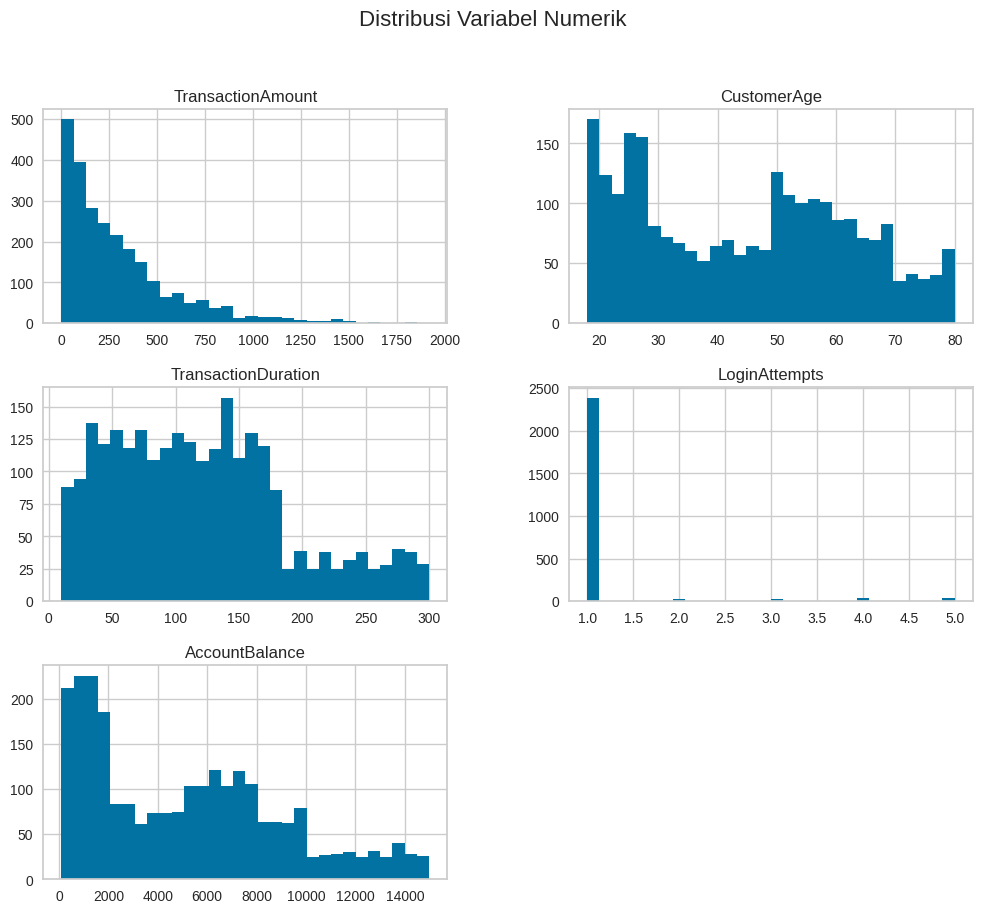

In [ ]:
df.hist(figsize=(12,10), bins=30)
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.show()

**Insights:**

1. Berdasarkan histogram di atas, kolom TransactionAmount menunjukkan distribusi right-skewed dimana data dominan berada di angka 0-250 dan lebih sedikit di angka 1000 ke atas. Ini menunjukkan adanya indikasi anomali 1000 transaksi yang jarang terjadi.

2. Pada kolom CustomerAge, segmentasi usia cukup beragam dari rentang usia 0-80 tahun. Tetapi ada beberapa kelompok usia yang lebih banyak penggunanya.

3. Pada TransactionDuration, dapat dilihat nilainya fluktuatif dengan puncak tertinggi di detik 150-an. Setelah detik 175 jumlah transaksi menurun tajam.

4. Pada LoginAttempts, jumlah percobaan paling banyak ada di angka 1 kali, sedangkan nilai lainnya jarang. Percobaan login yang lebih banyak bisa menjadi indikator potensi aktivitas tidak normal.

5. Distribusi AccountBalance menunjukkan pola right-skewed. Sebagian besar akun memiliki saldo rendah di bawah 2000, sementara hanya sedikit akun dengan saldo tinggi di atas 10.000.

In [ ]:
num_cols = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

outlier_counts = {}

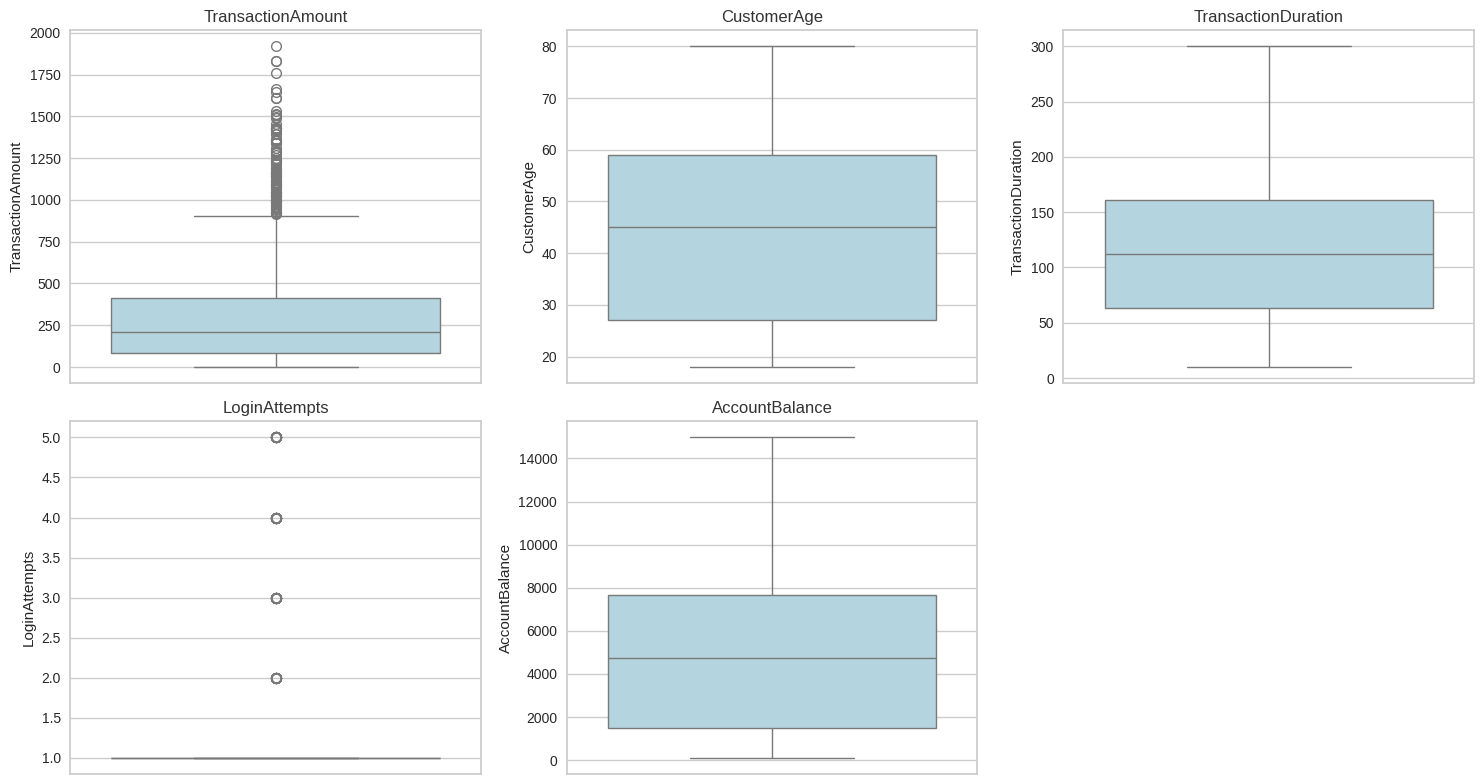

In [ ]:
plt.figure(figsize=(15, 8))

for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(col, color='#333333')

plt.tight_layout()
plt.show()

Pada boxplot TransactionAmount, ada banyak transaksi di luar batas IQR yang kemungkinan bisa menjadi  outliers. Tetapi hal ini bisa juga merupakan ciri penipuan.

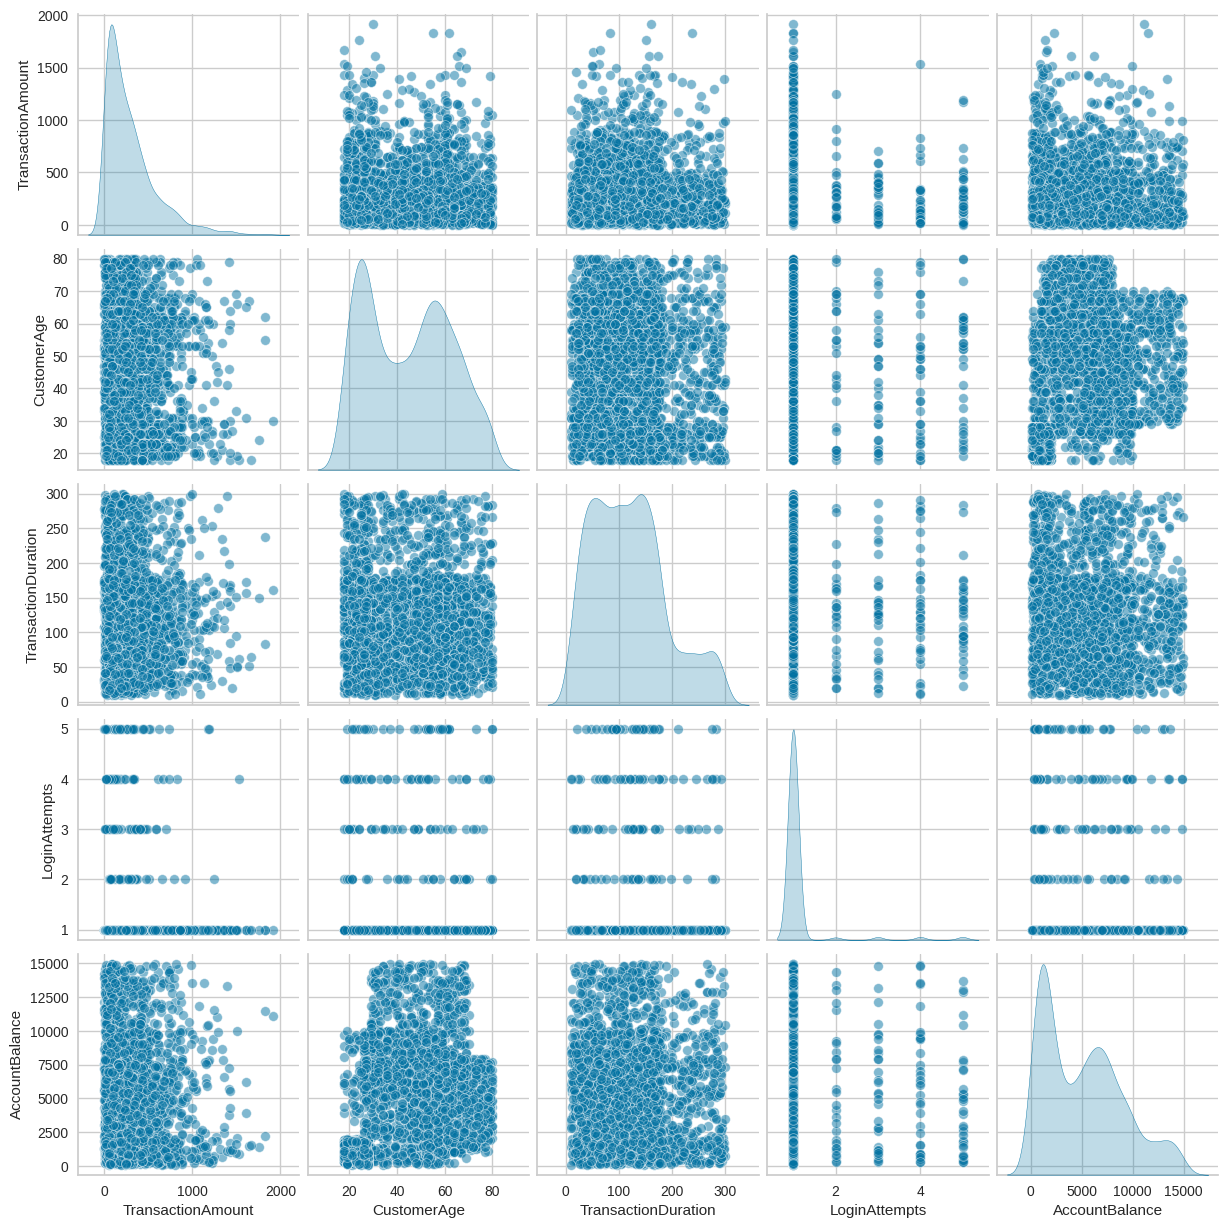

In [ ]:
sns.pairplot(df[num_cols], diag_kind='kde', plot_kws={'alpha': 0.5})

plt.show()

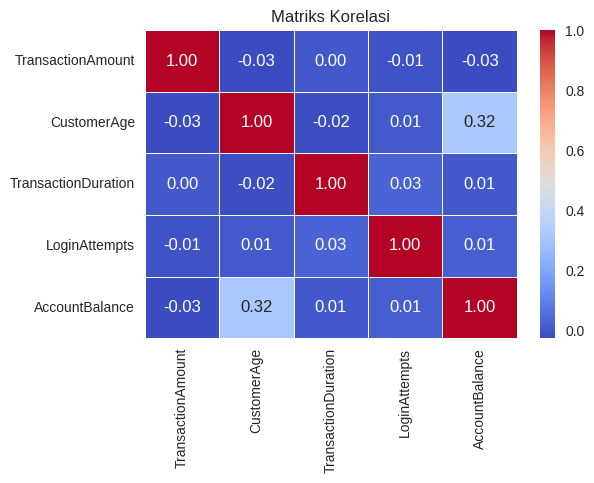

In [ ]:
corr_matrix = df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

Dari hasil heatmap di atas, CustomerAge dan AccountBalance memiliki korelasi tinggi  dengan nilai 0.32. Ini berarti semakin tua pengguna maka cenderung memiliki saldo yang besar.

Sedangkan variabel lainnya memiliki korelasi rendah karena dekat dengan angka 0.

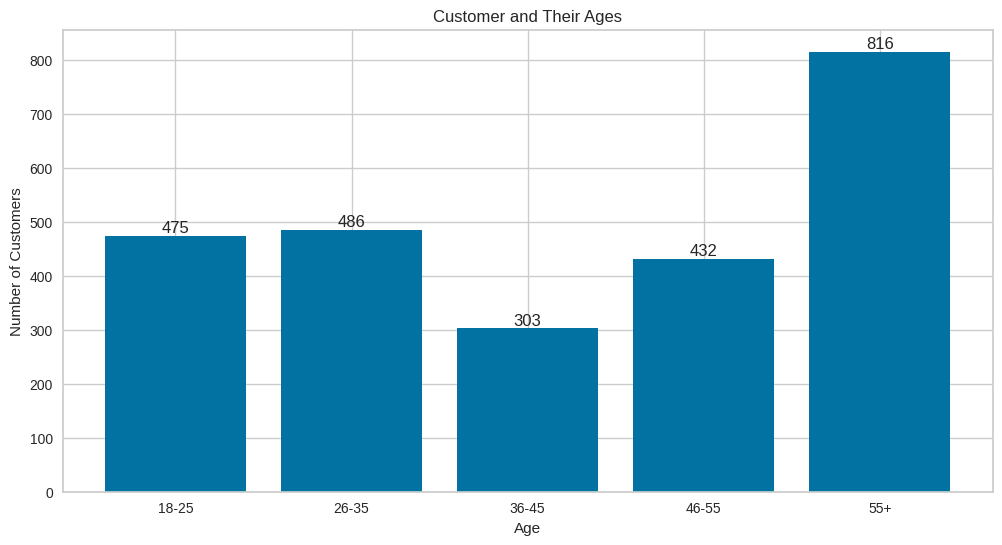

In [ ]:
age18_25 = df.CustomerAge[(df.CustomerAge >= 18) & (df.CustomerAge <= 25)]
age26_35 = df.CustomerAge[(df.CustomerAge >= 26) & (df.CustomerAge <= 35)]
age36_45 = df.CustomerAge[(df.CustomerAge >= 36) & (df.CustomerAge <= 45)]
age46_55 = df.CustomerAge[(df.CustomerAge >= 46) & (df.CustomerAge <= 55)]
age55above = df.CustomerAge[df.CustomerAge >= 56]

x = ["18-25", "26-35", "36-45", "46-55", "55+"]
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

plt.figure(figsize=(12, 6))
plt.bar(x, y)
plt.title("Customer and Their Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

<ipython-input-14-18731ee294bf>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_data = df.groupby("AgeGroup")["TransactionAmount"].sum().reset_index()


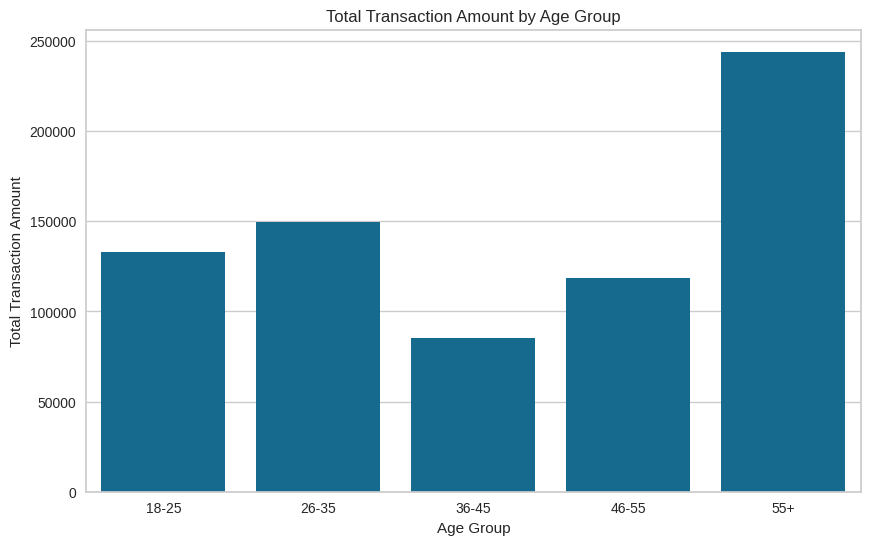

In [ ]:
bins = [18, 25, 35, 45, 55, 80]
labels = ["18-25", "26-35", "36-45", "46-55", "55+"]

df["AgeGroup"] = pd.cut(df["CustomerAge"], bins=bins, labels=labels, right=True)

age_group_data = df.groupby("AgeGroup")["TransactionAmount"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_data, x="AgeGroup", y="TransactionAmount")

plt.title("Total Transaction Amount by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Total Transaction Amount")
plt.show()

Transaksi terbanyak cenderung dilakukan oleh pengguna dengan usia di atas 55.

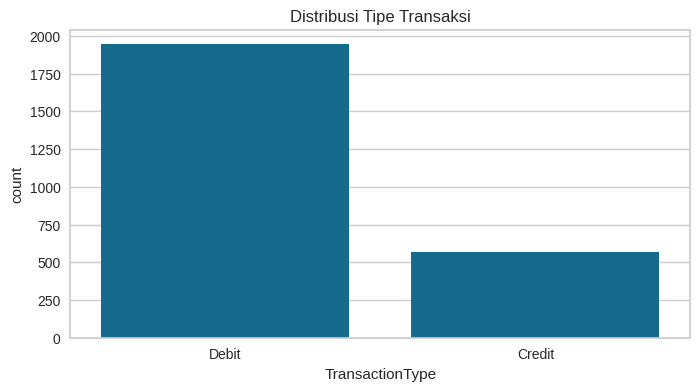

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df["TransactionType"], order=df["TransactionType"].value_counts().index)
plt.title("Distribusi Tipe Transaksi")
plt.show()

Pengguna lebih banyak melakukan transaksi debit dibandingkan credit.

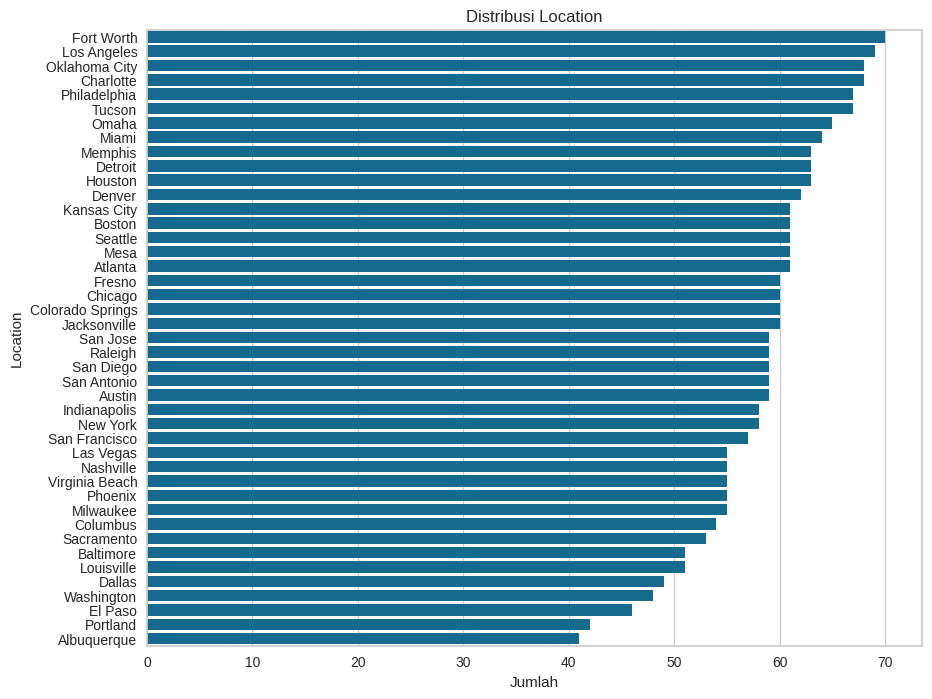

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(y=df["Location"], order=df["Location"].value_counts().index)
plt.title("Distribusi Location")
plt.xlabel("Jumlah")
plt.ylabel("Location")
plt.show()

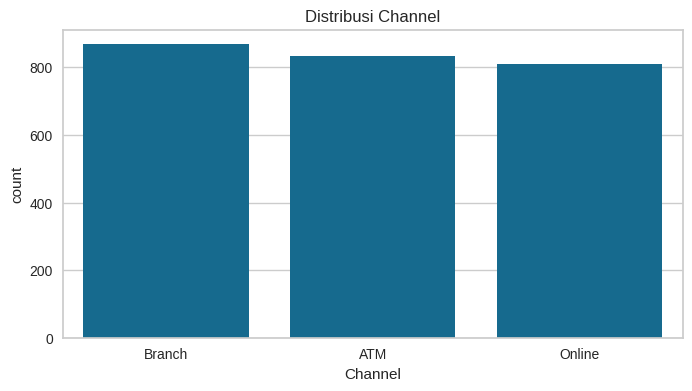

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df["Channel"], order=df["Channel"].value_counts().index)
plt.title(f'Distribusi Channel')
plt.show()

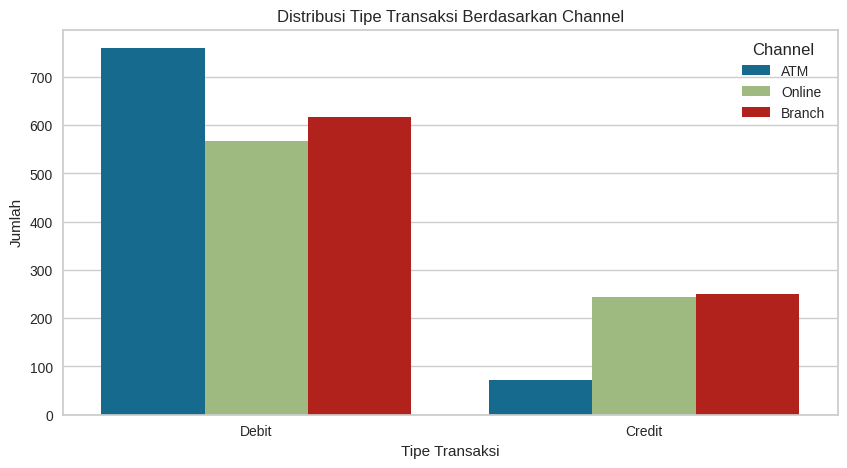

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x="TransactionType", hue="Channel")

plt.title("Distribusi Tipe Transaksi Berdasarkan Channel")
plt.xlabel("Tipe Transaksi")
plt.ylabel("Jumlah")
plt.legend(title="Channel")

plt.show()

Transaksi debit lebih sering dilakukan pada channel ATM, sedangkan transaksi credit lebih sering dilakukan pada channel branch.

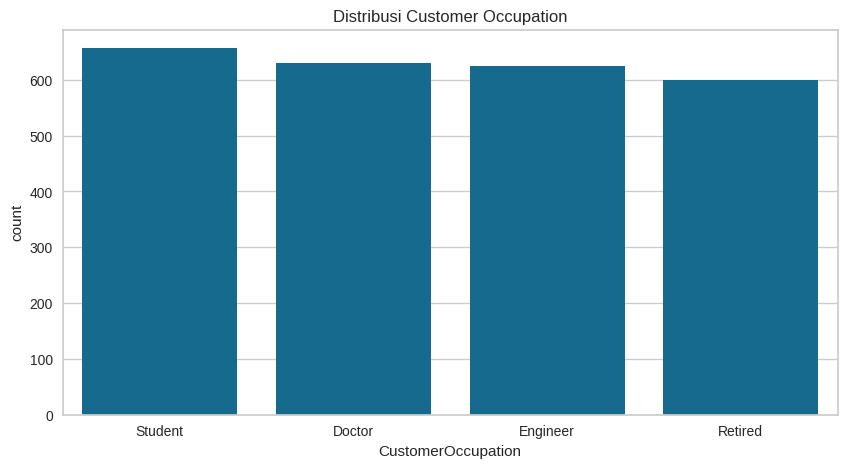

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["CustomerOccupation"], order=df["CustomerOccupation"].value_counts().index)
plt.title(f'Distribusi Customer Occupation')
plt.show()

# **5. Data Preprocessing**

In [ ]:
df_original = df.copy()

In [ ]:
df.isna().sum()

TransactionID               0
AccountID                   0
TransactionAmount           0
TransactionDate             0
TransactionType             0
Location                    0
DeviceID                    0
IP Address                  0
MerchantID                  0
Channel                     0
CustomerAge                 0
CustomerOccupation          0
TransactionDuration         0
LoginAttempts               0
AccountBalance              0
PreviousTransactionDate     0
AgeGroup                   56
dtype: int64

In [ ]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


Dataset ini tidak memiliki missing values maupun data duplikasi selain AgeGroup.

In [ ]:
# Identifikasi outlier dengan IQR

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_counts[col] = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
for col, count in outlier_counts.items():
    print(f"{col}: {count} outliers")

TransactionAmount: 113 outliers
CustomerAge: 0 outliers
TransactionDuration: 0 outliers
LoginAttempts: 122 outliers
AccountBalance: 0 outliers


In [ ]:
# Penanganan outliers dengan Winsorizing
outlier_cols = ['TransactionAmount', 'LoginAttempts']

for col in outlier_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])

print(df[outlier_cols].describe())

       TransactionAmount  LoginAttempts
count        2512.000000         2512.0
mean          283.619678            1.0
std           247.712509            0.0
min            16.160000            1.0
25%            81.885000            1.0
50%           211.140000            1.0
75%           414.527500            1.0
max           878.630000            1.0


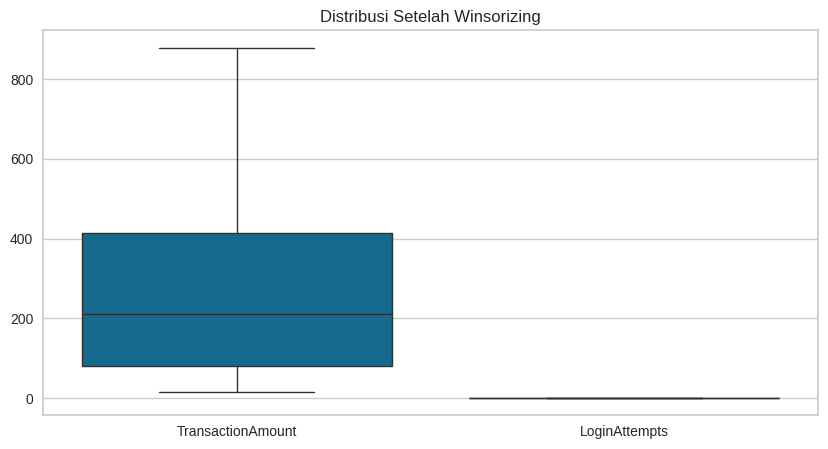

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['TransactionAmount', 'LoginAttempts']])
plt.title("Distribusi Setelah Winsorizing")
plt.show()

In [ ]:
# Mengubah tipe data TransactionDate dan PreviousTransactionDate menjadi Datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

df[['TransactionDate', 'PreviousTransactionDate']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionDate          2512 non-null   datetime64[ns]
 1   PreviousTransactionDate  2512 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 39.4 KB


In [ ]:
# Label Encoding untuk TransactionType
df['TransactionType'] = df['TransactionType'].map({'Debit': 0, 'Credit': 1})

In [ ]:
# One-Hot Encoding untuk Channel dan Customer Occupation
df = pd.get_dummies(df, columns=['Channel'], drop_first=False)
df = pd.get_dummies(df, columns=['CustomerOccupation'], drop_first=False)

Penipuan bank bisa dilihat berdasarkan frekuensi transaksi suatu akun, jam frekuensi, penggunaan banyak device oleh satu akun, dan penggunaan beragam alamat IP oleh satu akun.

In [ ]:
df['FrekuensiTransaksi'] = df.groupby('AccountID')['TransactionID'].transform('count')

df['JamTransaksi'] = df['TransactionDate'].dt.hour

df['PenggunaanDevice'] = df.groupby('DeviceID')['AccountID'].transform('count')

df['IPAddressAccount'] = df.groupby('IP Address')['AccountID'].transform('count')

In [ ]:
for col in ['Location', 'IP Address', 'MerchantID']:
    count_encoding = df[col].value_counts()
    df[col] = df[col].map(count_encoding)

In [ ]:
# Membuat dataframe baru
df_new = df.copy()

In [ ]:
# Mengubah tipe data bool menjadi int untuk memudahkan clustering
df_new = df_new.astype({col: 'int' for col in df_new.select_dtypes('bool').columns})

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   TransactionID                2512 non-null   object        
 1   AccountID                    2512 non-null   object        
 2   TransactionAmount            2512 non-null   float64       
 3   TransactionDate              2512 non-null   datetime64[ns]
 4   TransactionType              2512 non-null   int64         
 5   Location                     2512 non-null   int64         
 6   DeviceID                     2512 non-null   object        
 7   IP Address                   2512 non-null   int64         
 8   MerchantID                   2512 non-null   int64         
 9   CustomerAge                  2512 non-null   int64         
 10  TransactionDuration          2512 non-null   int64         
 11  LoginAttempts                2512 non-null 

In [ ]:
df_new.head()

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              16.16 2023-04-11 16:29:14   
1      TX000002   AC00455             376.24 2023-06-27 16:44:19   
2      TX000003   AC00019             126.29 2023-07-10 18:16:08   
3      TX000004   AC00070             184.50 2023-05-05 16:32:11   
4      TX000005   AC00411              16.16 2023-10-16 17:51:24   

   TransactionType  Location DeviceID  IP Address  MerchantID  CustomerAge  \
0                0        59  D000380           3          32           70   
1                0        63  D000051           4          27           68   
2                0        61  D000235           7          30           19   
3                0        59  D000187           8          31           26   
4                1        61  D000308           4          31           26   

   ...  Channel_Branch  Channel_Online  CustomerOccupation_Doctor  \
0  ...               0               0                          1   
1  ...               0               0                          1   
2  ...               0               1                          0   
3  ...               0               1                          0   
4  ...               0               1                          0   

  CustomerOccupation_Engineer CustomerOccupation_Retired  \
0                           0                          0   
1                           0                          0   
2                           0                          0   
3                           0                          0   
4                           0                          0   

   CustomerOccupation_Student  FrekuensiTransaksi  JamTransaksi  \
0                           0                   7            16   
1                           0                   7            16   
2                           1                   4            18   
3                           1                   8            16   
4                           1                   6            17   

   PenggunaanDevice  IPAddressAccount  
0                 6                 3  
1                 5                 4  
2                 5                 7  
3                 6                 8  
4                 3                 4  

[5 rows x 26 columns]

In [ ]:
features = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'TransactionType', 'Channel_ATM',
            'Channel_Online', 'Channel_Branch', 'CustomerOccupation_Doctor', 'CustomerOccupation_Student', 'CustomerOccupation_Retired',
            'CustomerOccupation_Engineer', 'JamTransaksi', 'FrekuensiTransaksi', 'PenggunaanDevice', 'IPAddressAccount']

X = df_new[features].copy()

# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=4)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
total_variance_explained = np.sum(explained_variance) * 100

print("Explained Variance Ratio:", explained_variance)
print("Total Variance Explained:", total_variance_explained, "%")

Explained Variance Ratio: [0.16504411 0.15700281 0.15511672 0.12438716]
Total Variance Explained: 60.15507915574514 %


# **6. Pembangunan Model Clustering**

## **a. Menentukan Jumlah Cluster K**

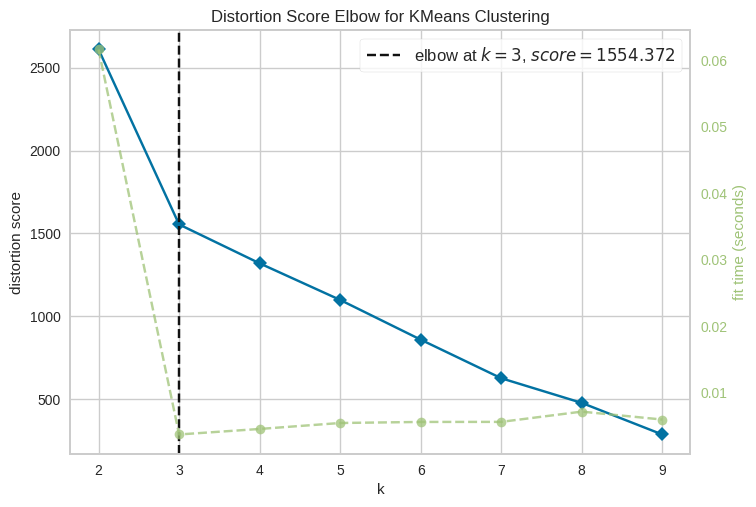

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2, 10))
visualizer.fit(X_pca)

visualizer.show()

## **b. Pembangunan dan Evaluasi Model Clustering**

In [ ]:
# Evaluasi dengan Silhouette Score
best_k = 3
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_new['Cluster_KMeans'] = kmeans.fit_predict(X_pca)
sil_score_before = silhouette_score(X_pca, df_new['Cluster_KMeans'])
print(f'Silhouette Score sebelum Feature Selection: {sil_score_before:.4f}')

Silhouette Score sebelum Feature Selection: 0.4454


## **c. Feature Selection (Opsional)**

In [ ]:
# Feature Selection dengan Mutual Information
mi_scores = mutual_info_classif(X, df_new['Cluster_KMeans'])
feature_scores = pd.Series(mi_scores, index=features).sort_values(ascending=False)
selected_features_mi = feature_scores[feature_scores > 0.01].index.tolist()

# Pastikan ada cukup fitur untuk RFE
if len(selected_features_mi) >= 5:
    n_features_rfe = min(len(selected_features_mi), 5)
    estimator = RandomForestClassifier(n_estimators=50, random_state=42)
    rfe = RFE(estimator, n_features_to_select=n_features_rfe)
    rfe.fit(X[selected_features_mi], df_new['Cluster_KMeans'])
    selected_features_rfe = [feature for feature, selected in zip(selected_features_mi, rfe.support_) if selected]
else:
    selected_features_rfe = selected_features_mi

# Scaling Data
X_selected_final = df_new[selected_features_rfe].copy()
scaler = MinMaxScaler()
X_selected_scaled_final = scaler.fit_transform(X_selected_final)

# Menentukan jumlah cluster terbaik kembali setelah feature selection
sil_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_selected_scaled_final)
    sil_scores[k] = silhouette_score(X_selected_scaled_final, cluster_labels)

best_k_new = max(sil_scores, key=sil_scores.get)

kmeans = KMeans(n_clusters=best_k_new, random_state=42, n_init=10)
df_new['Cluster_KMeans'] = kmeans.fit_predict(X_selected_scaled_final)

sil_score_final = silhouette_score(X_selected_scaled_final, df_new['Cluster_KMeans'])
print(f'Silhouette Score setelah kombinasi MI & RFE: {sil_score_final:.4f}')
print(f'Fitur Terpilih: {selected_features_rfe}')
print(f'Jumlah Cluster Optimal: {best_k_new}')

Silhouette Score setelah kombinasi MI & RFE: 0.7152
Fitur Terpilih: ['Channel_Branch', 'Channel_ATM', 'Channel_Online', 'TransactionType', 'TransactionAmount']
Jumlah Cluster Optimal: 6


In [ ]:
# Perbandingan Silhouette Score
print(f'Silhouette Score Before: {sil_score_before:.4f}')
print(f'Silhouette Score After: {sil_score_final:.4f}')

Silhouette Score Before: 0.4454
Silhouette Score After: 0.7152


## **d. Visualisasi Hasil Clustering**

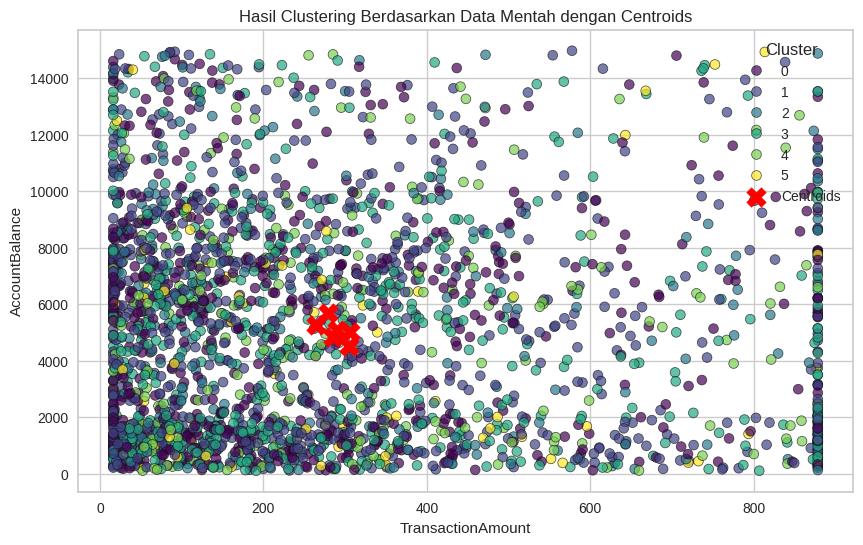

In [ ]:
feature_x = 'TransactionAmount'
feature_y = 'AccountBalance'

centroids = df_new.groupby('Cluster_KMeans')[[feature_x, feature_y]].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x=feature_x, y=feature_y, hue=df_new['Cluster_KMeans'], palette='viridis', alpha=0.7, edgecolor='k')

plt.scatter(centroids[feature_x], centroids[feature_y], marker='X', s=200, color='red', label='Centroids')

plt.title('Hasil Clustering Berdasarkan Data Mentah dengan Centroids')
plt.xlabel(feature_x)
plt.ylabel(feature_y)
plt.legend(title='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Inverse Transform

In [ ]:
inversed_df = df_new.copy()

features_scaled = ['TransactionAmount', 'AccountBalance']
scaler = MinMaxScaler()
scaler.fit(df_original[features_scaled])
inversed_df[features_scaled] = scaler.inverse_transform(inversed_df[features_scaled])

# Inverse One-Hot Encoding untuk 'Channel' dan 'CustomerOccupation'
channel_columns = ['Channel_ATM', 'Channel_Branch', 'Channel_Online']
customer_occ_columns = ['CustomerOccupation_Doctor', 'CustomerOccupation_Engineer',
                         'CustomerOccupation_Retired', 'CustomerOccupation_Student']

# Inverse Channel
inversed_df['Channel'] = inversed_df[channel_columns].idxmax(axis=1).str.replace('Channel_', '')
inversed_df.drop(columns=channel_columns, inplace=True)

# Inverse Customer Occupation
inversed_df['CustomerOccupation'] = inversed_df[customer_occ_columns].idxmax(axis=1).str.replace('CustomerOccupation_', '')
inversed_df.drop(columns=customer_occ_columns, inplace=True)

# Inverse Label Encoding untuk 'TransactionType'
inversed_df['TransactionType'] = inversed_df['TransactionType'].map({0: 'Debit', 1: 'Credit'})

# Inverse Count Encoding untuk 'Location', 'IP Address', 'MerchantID'
for col in ['Location', 'IP Address', 'MerchantID']:
    original_mapping = df_original[col].value_counts().to_dict()
    inversed_df[col] = inversed_df[col].map({v: k for k, v in original_mapping.items()})

inversed_df['TransactionDate'] = pd.to_datetime(inversed_df['TransactionDate'])
inversed_df['PreviousTransactionDate'] = pd.to_datetime(inversed_df['PreviousTransactionDate'])

print(inversed_df.head())

  TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128         31008.8760 2023-04-11 16:29:14   
1      TX000002   AC00455        721948.3840 2023-06-27 16:44:19   
2      TX000003   AC00019        242331.8265 2023-07-10 18:16:08   
3      TX000004   AC00070        354028.0850 2023-05-05 16:32:11   
4      TX000005   AC00411         31008.8760 2023-10-16 17:51:24   

  TransactionType Location DeviceID       IP Address MerchantID  CustomerAge  \
0           Debit   Austin  D000380  177.172.184.163       M015           70   
1           Debit  Houston  D000051      13.149.61.4       M018           68   
2           Debit  Atlanta  D000235    186.135.2.148       M088           19   
3           Debit   Austin  D000187  134.222.122.238       M091           26   
4          Credit  Atlanta  D000308      13.149.61.4       M091           26   

   ...  AccountBalance  PreviousTransactionDate  AgeGroup FrekuensiTransaksi  \
0  ...    7.605312e+07      20

In [ ]:
inversed_df['Cluster_KMeans'] = kmeans.labels_

inversed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   CustomerAge              2512 non-null   int64         
 10  TransactionDuration      2512 non-null   int64         
 11  LoginAttempts            2512 non-null   int64         
 12  AccountBalance           2512 non-

In [ ]:
inversed_df.head()

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128         31008.8760 2023-04-11 16:29:14   
1      TX000002   AC00455        721948.3840 2023-06-27 16:44:19   
2      TX000003   AC00019        242331.8265 2023-07-10 18:16:08   
3      TX000004   AC00070        354028.0850 2023-05-05 16:32:11   
4      TX000005   AC00411         31008.8760 2023-10-16 17:51:24   

  TransactionType Location DeviceID       IP Address MerchantID  CustomerAge  \
0           Debit   Austin  D000380  177.172.184.163       M015           70   
1           Debit  Houston  D000051      13.149.61.4       M018           68   
2           Debit  Atlanta  D000235    186.135.2.148       M088           19   
3           Debit   Austin  D000187  134.222.122.238       M091           26   
4          Credit  Atlanta  D000308      13.149.61.4       M091           26   

   ...  AccountBalance  PreviousTransactionDate  AgeGroup FrekuensiTransaksi  \
0  ...    7.605312e+07      2024-11-04 08:08:08       55+                  7   
1  ...    2.046878e+08      2024-11-04 08:09:35       55+                  7   
2  ...    1.669701e+07      2024-11-04 08:07:04     18-25                  4   
3  ...    1.274798e+08      2024-11-04 08:09:06     26-35                  8   
4  ...    1.105254e+08      2024-11-04 08:06:39     26-35                  6   

  JamTransaksi  PenggunaanDevice  IPAddressAccount  Cluster_KMeans  Channel  \
0           16                 6                 3               1      ATM   
1           16                 5                 4               1      ATM   
2           18                 5                 7               3   Online   
3           16                 6                 8               3   Online   
4           17                 3                 4               2   Online   

   CustomerOccupation  
0              Doctor  
1              Doctor  
2             Student  
3             Student  
4             Student  

[5 rows x 22 columns]

### Interpretasi Hasil

In [ ]:
inversed_df['CustomerOccupation'].value_counts()

CustomerOccupation
Student     657
Doctor      631
Engineer    625
Retired     599
Name: count, dtype: int64

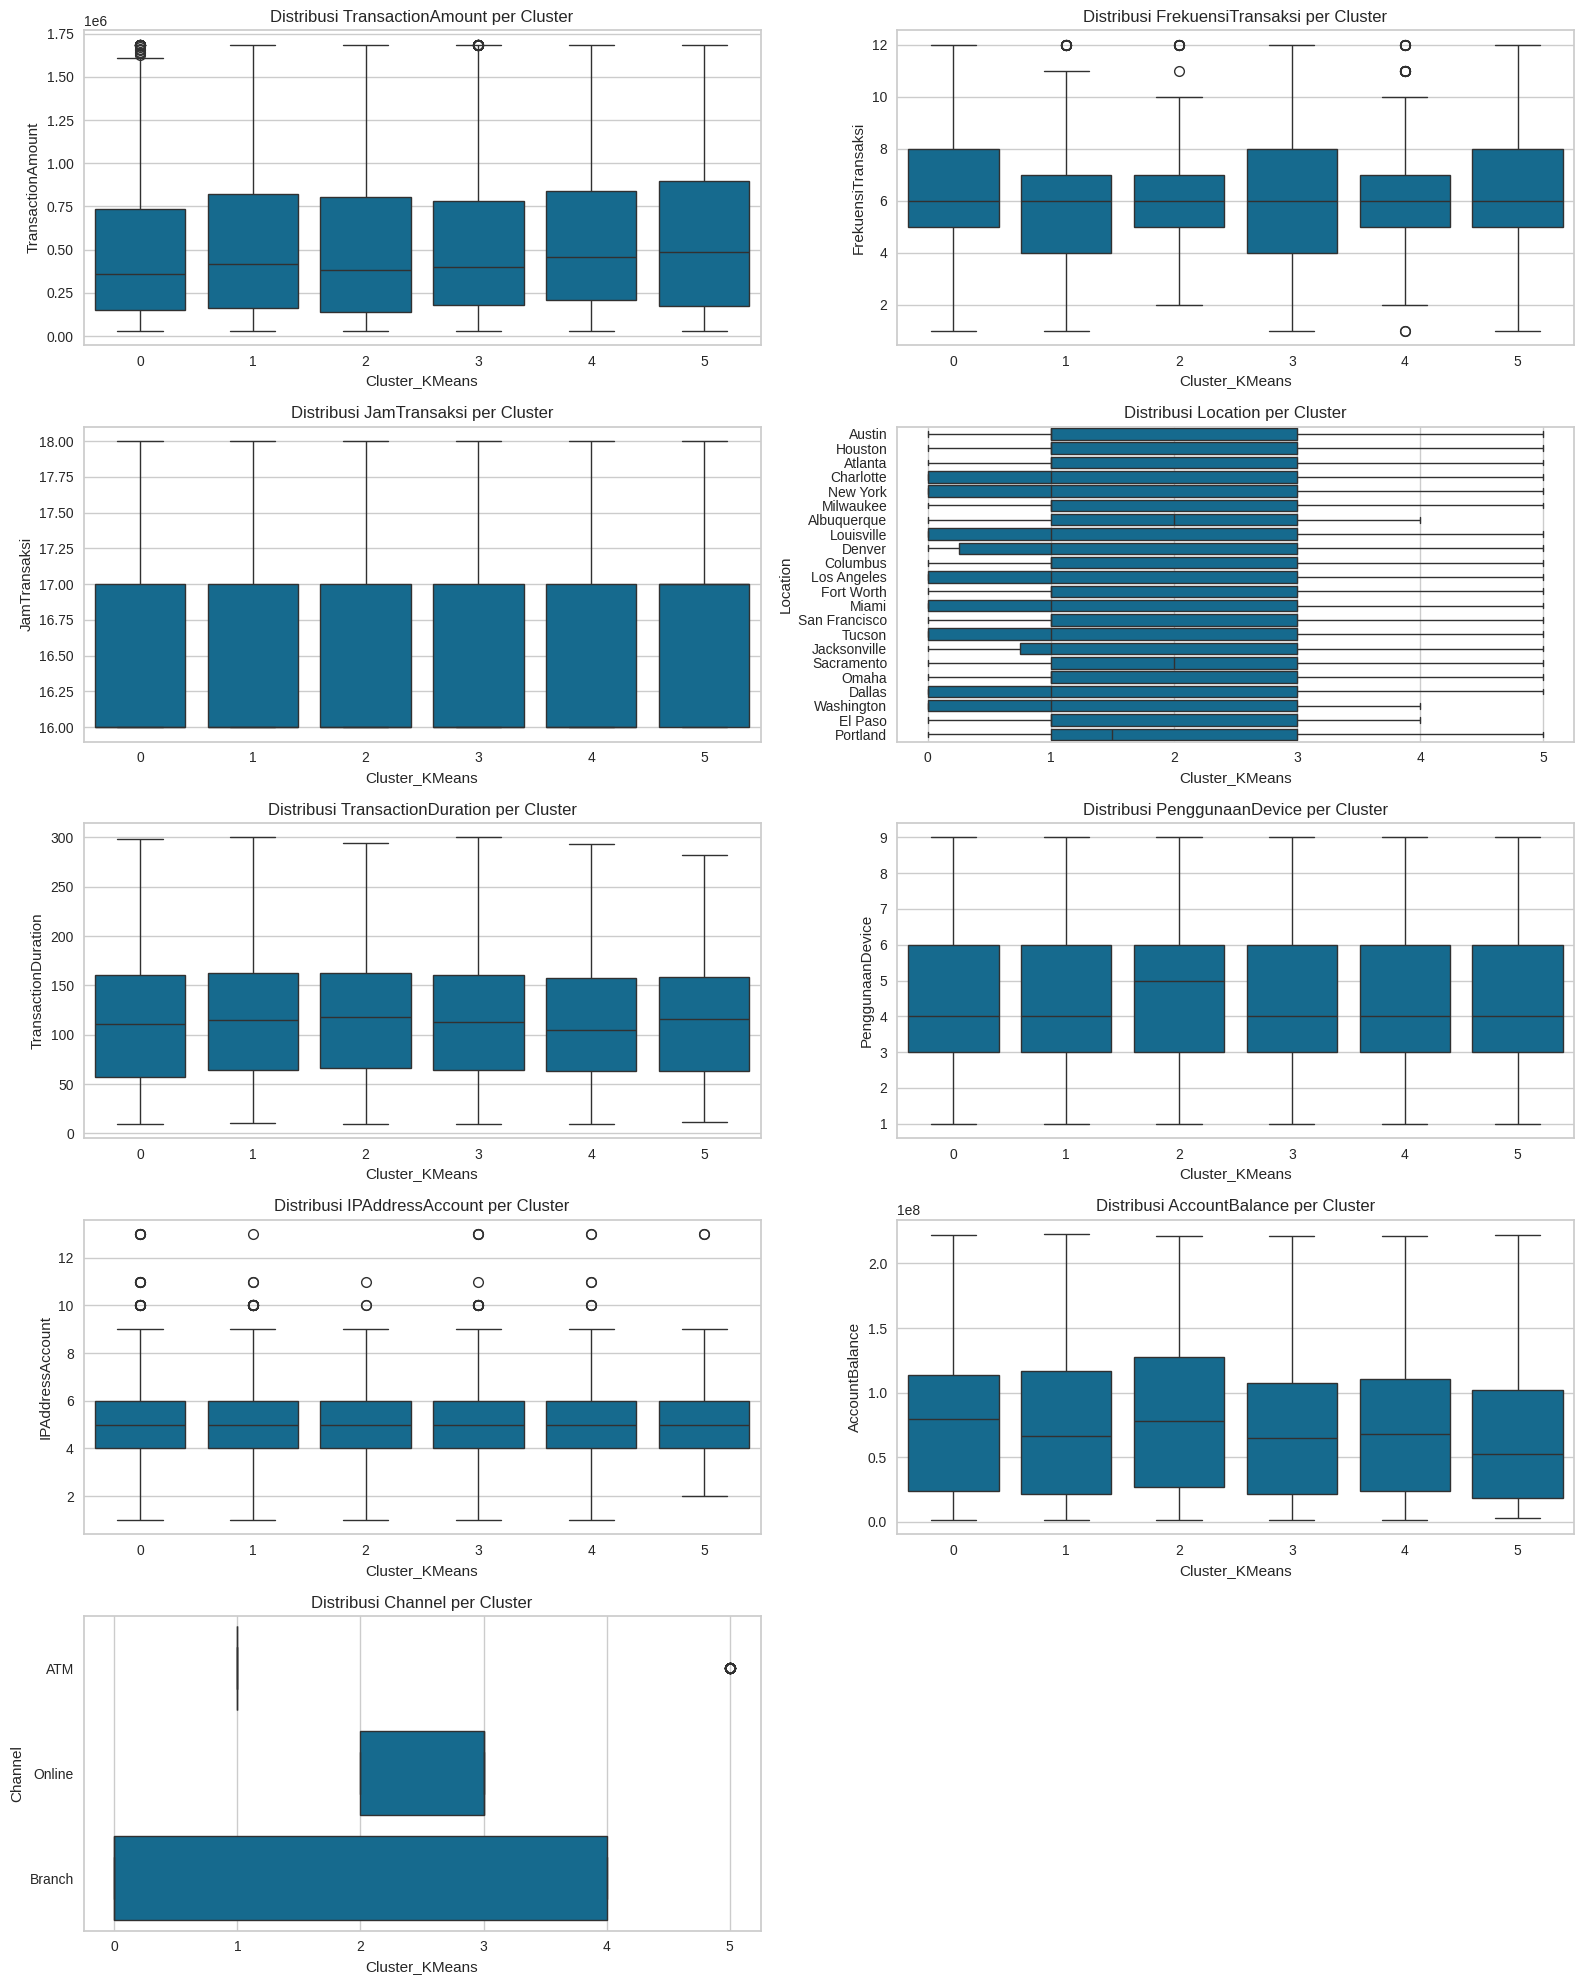

In [ ]:
features_cek = ['TransactionAmount', 'FrekuensiTransaksi', 'JamTransaksi', 'Location', 'TransactionDuration',
                'PenggunaanDevice', 'IPAddressAccount', 'AccountBalance', 'Channel']

n_features = len(features_cek)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

plt.figure(figsize=(16, 4 * n_rows))

for i, col in enumerate(features_cek):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x='Cluster_KMeans', y=col, data=inversed_df)
    plt.title(f'Distribusi {col} per Cluster')

plt.tight_layout()
plt.show()

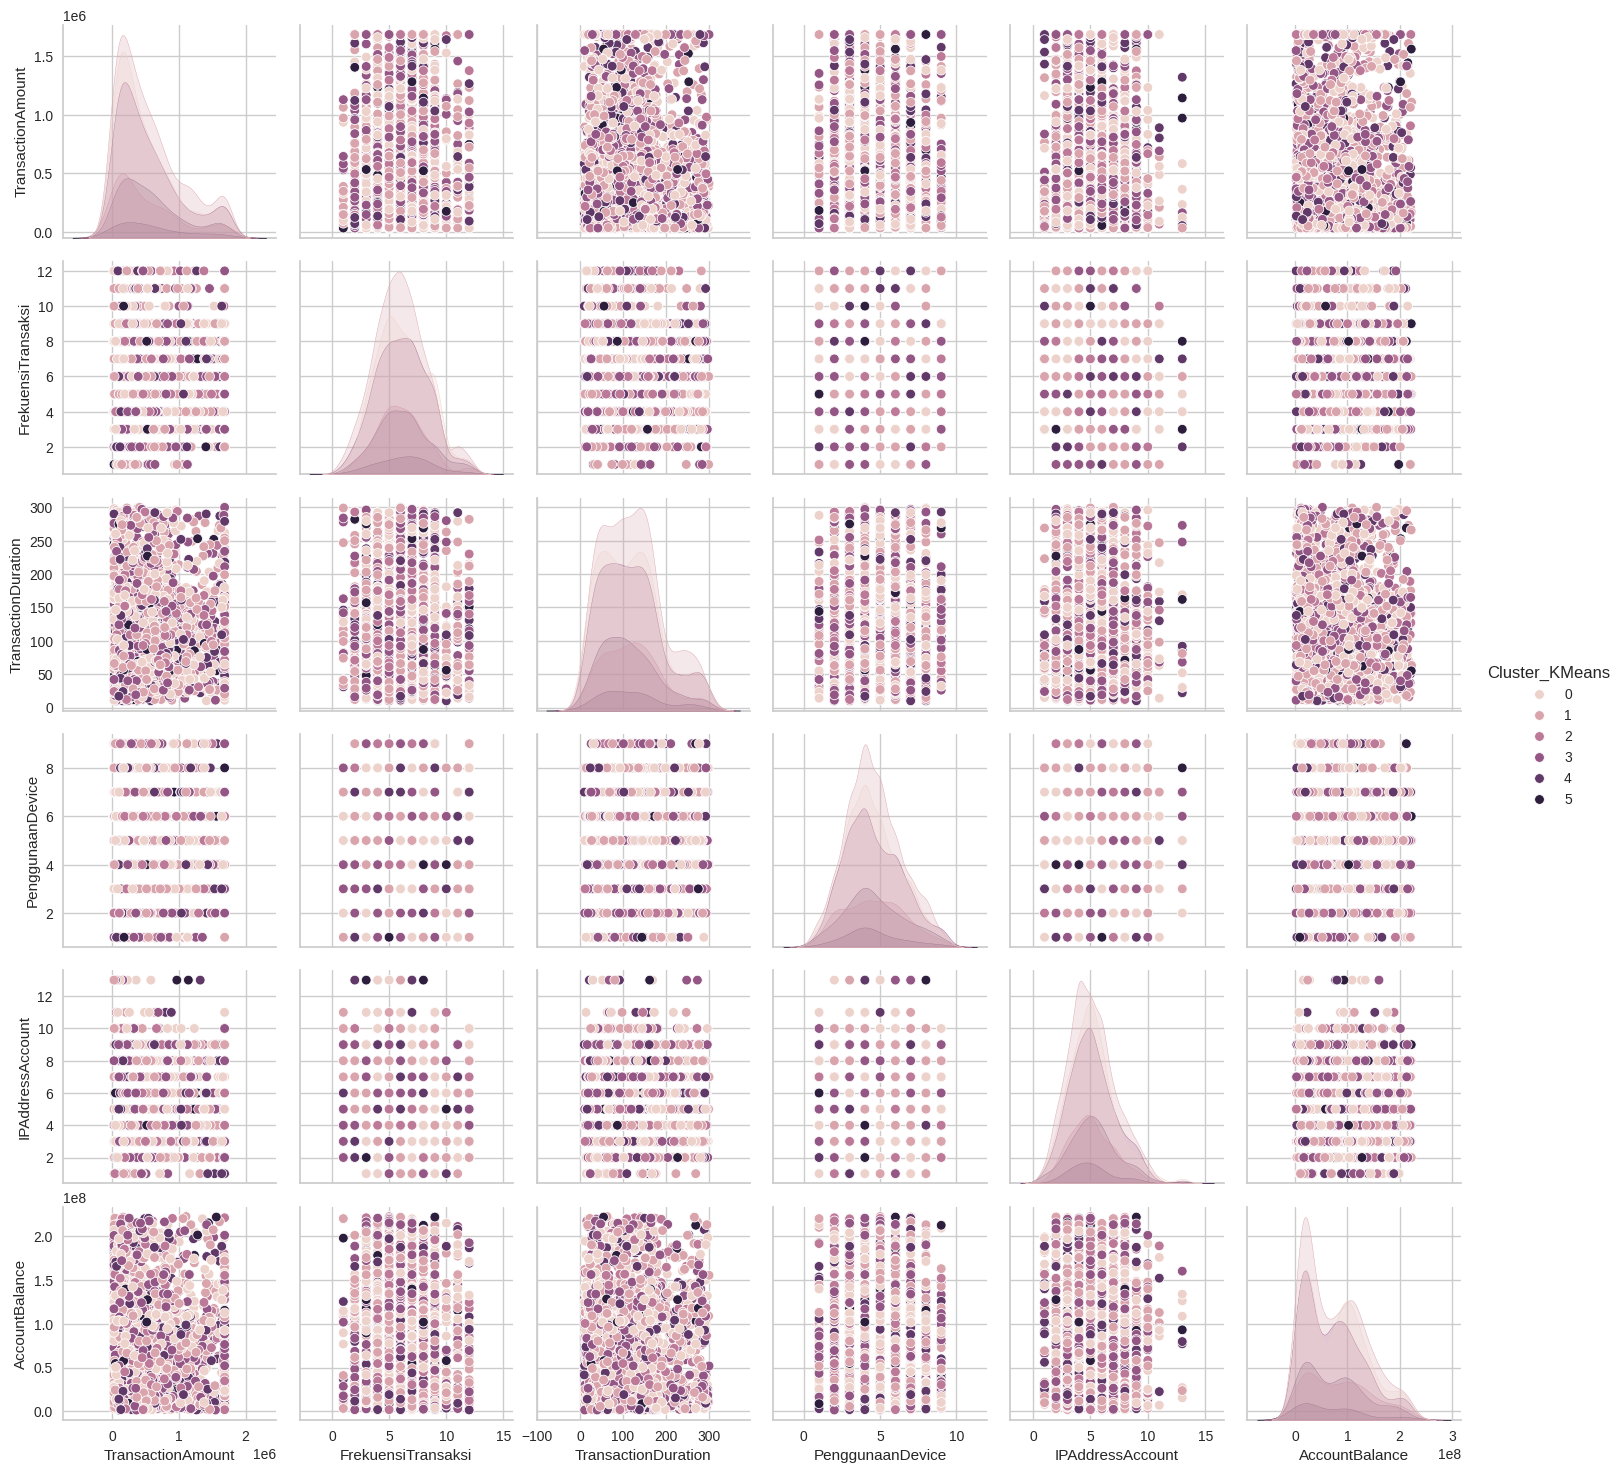

In [ ]:
features_for_pairplot = ['TransactionAmount', 'FrekuensiTransaksi', 'TransactionDuration',
                         'PenggunaanDevice', 'IPAddressAccount', 'AccountBalance']
sns.pairplot(inversed_df, hue='Cluster_KMeans', vars=features_for_pairplot)
plt.show()

# Analisis Karakteristik Cluster

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **TransactionAmount**: Sedang, dengan beberapa outlier bernilai tinggi.
- **FrekuensiTransaksi**: Cukup tersebar, tetapi cenderung rendah dibandingkan cluster lainnya.
- **TransactionDuration**: Cukup merata.
- **PenggunaanDevice**: Rata-rata penggunaan perangkat berada di tengah, tidak ada dominasi satu perangkat tertentu.
- **IPAddressAccount**: Beberapa akun memiliki jumlah IP yang lebih banyak, tapi tidak ekstrim.
- **AccountBalance**: Saldo menengah ke atas.
- **Channel**: Mayoritas transaksi dilakukan melalui Branch, sedikit yang menggunakan ATM dan Online.

- **Analisis**:
Cluster ini kemungkinan besar terdiri dari pengguna normal dengan transaksi normal melalui Channel Branch. Risiko fraud rendah.

## Cluster 1:
- **TransactionAmount**: Transaksi lebih tinggi dibandingkan cluster 0.
- **FrekuensiTransaksi**: Sedikit lebih tinggi dibandingkan cluster 0.
- **TransactionDuration**: Tidak ada perbedaan khusus.
- **PenggunaanDevice**: Tidak ada dominasi satu jenis perangkat.
- **IPAddressAccount**: Beberapa akun memiliki jumlah IP yang tinggi, tetapi sebagian besar berada dalam kisaran normal.
- **AccountBalance**: Sebagian besar akun memiliki saldo sedang hingga tinggi.
- **Channel**: Distribusi antara Branch dan ATM, sedikit transaksi Online.

- **Analisis**:
Cluster ini memiliki nilai transaksi dan frekuensi yang lebih tinggi daripada cluster 0. Masih dalam kategori pengguna normal.

## Cluster 2:
- **TransactionAmount**: Tinggi, ada beberapa transaksi yang sangat besar.
- **FrekuensiTransaksi**: Cukup tinggi.
- **TransactionDuration**: Tidak menunjukkan pola yang khusus.
- **PenggunaanDevice**: Lebih banyak perangkat digunakan dibandingkan cluster lain.
- **IPAddressAccount**: Beberapa akun memiliki banyak IP.
- **AccountBalance**: Tinggi.
- **Channel**: Dominasi transaksi melalui Online, sedikit melalui ATM dan Branch.

- **Analisis**:
Pada cluster ini, penggunaan banyak perangkat dan IP dalam transaksi online dapat menjadi tanda potensi fraud.

## Cluster 3:
- **TransactionAmount**: Sedang hingga tinggi.
- **FrekuensiTransaksi**: Tinggi.
- **TransactionDuration**: Tidak ada pola khusus.
- **PenggunaanDevice**: Distribusi cukup merata.
- **IPAddressAccount**: Beberapa akun memiliki banyak IP yang berbeda.
- **AccountBalance**: Saldo akun cukup tinggi.
- **Channel**: Kombinasi transaksi Online dan ATM, tetapi masih ada sebagian di Branch.

- **Analisis**:
Cluster ini mungkin berisi akun yang lebih aktif dalam transaksi, tetapi tidak mencolok untuk fraud. Namun, kombinasi transaksi tinggi dan banyaknya alamat IP dapat menjadi tanda anomali.

## Cluster 4:
- **TransactionAmount**: Tinggi.
- **FrekuensiTransaksi**: Tidak terlalu tinggi, tetapi transaksi dalam jumlah besar.
- **TransactionDuration**: Tidak ada pola khusus.
- **PenggunaanDevice**: Tidak berbeda jauh dari cluster lainnya.
- **IPAddressAccount**: Beberapa akun memiliki jumlah IP yang sangat tinggi.
- **AccountBalance**: Saldo akun sangat tinggi.
- **Channel**: Mayoritas transaksi dilakukan melalui Online, hampir tidak ada transaksi melalui ATM atau Branch.

- **Analisis**:
Cluster ini memiliki kemungkinan fraud yang sangat tinggi karena transaksi bernilai besar dilakukan secara online dengan banyak alamat IP yang digunakan.

## Cluster 5:
- **TransactionAmount**: Variatif, ada transaksi kecil dan sangat besar.
- **FrekuensiTransaksi**: Sangat tinggi (Paling tinggi di antara semua cluster).
- **TransactionDuration**: Beberapa transaksi memiliki durasi sangat panjang.
- **PenggunaanDevice**: Menggunakan banyak perangkat berbeda.
- **IPAddressAccount**: Sangat tinggi dibandingkan cluster lain.
- **AccountBalance**: Beberapa akun memiliki saldo sangat besar, tetapi ada juga yang rendah.
- **Channel**: Dominan online, hanya ada sedikit transaksi melalui ATM dan Branch.

- **Analisis**:
Menunjukkan kemungkinan besar adanya aktivitas fraud.

---------------------

**Kesimpulan**:

1. Cluster 0 & 1 termasuk ke dalam kategori akun normal atau pengguna reguler, tidak ada indikasi fraud yang kuat.

2. Cluster 2 & 3 masuk ke dalam kategori akun aktif. Kemungkinan pengguna bisnis atau pengguna dengan transaksi tinggi, tetapi ada indikasi anomali.

3. Cluster 4 & 5 merupakan cluster yang berpotensi tinggi sebagai akun fraud, karena memiliki transaksi besar, frekuensi tinggi, alamat IP bervariasi, dan menggunakan banyak perangkat dengan channel Online.

# **7. Mengeksport Data**


Simpan hasilnya ke dalam file CSV.

In [ ]:
inversed_df.to_csv("clustering_result.csv", index=False)